# SOCIAL MEDIA ANALYSIS WITH SPARK
## BY DWI SMARADAHANA INDRALOKA
***

## INTRODUCTION
Practise Case kali ini menggunakan data tweets dari file "clean_tweet.csv" dimana data berisi dua kolom dengan komlom pertama berisi teks dari tweets dan kolom kedua berisi kategori sentimen (0 = "Negatif" dan 1 = "Positif") dari tweets tersebut, kemudian dilakukan Data Preprocessing, Data Exploration dan Feature Extraction untuk dijadikan dasar pembuatan model klasifikasi yang dapat digunakan untuk menentukan kategori sentimen dari tweets baru.

## IMPORT LIBRARY

In [1]:
import pandas as pd 
import numpy as np

#import nltk for natural language toolkit
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import Word

#import visualization module
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

#import sklearn preprocessing 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#import sklearn for modeling
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#import sklearn for model evaluation 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## UPLOAD DATASET

In [2]:
data = pd.read_csv("clean_tweet.csv")
data = data.rename_axis(index = "no")
data.head()

,text,target
no,,
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


## COUNT THE PERCENTAGE OF MISSING VALUE

In [3]:
percentage = round(data.isna().sum()/len(data)*100, 2).sort_values(ascending = False)
percentage

text      0.2
target    0.0
dtype: float64

## DROPPING MISSING VALUE

In [4]:
data = data.dropna()
percentage = round(data.isna().sum()/len(data)*100, 2).sort_values(ascending = False)
percentage

target    0.0
text      0.0
dtype: float64

## DATA PREPROCESSING

### 1. Stopwords Removal

Proses ini dilakukan untuk menghilangkan kata-kata yang tidak memiliki makna di dalam suatu kalimat

In [5]:
stop = stopwords.words("english")
data["text"] = data["text"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

### 2. Lemmatization

Proses ini dilakukan untuk menjadikan suatu kata menjadi kata dasarnya

In [6]:
data["text"] = data["text"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

### 3. Frequent Words Removal

Proses ini dilakukan untuk mencari kata-kata yang paling sering muncul dan menghilangkan kata-kata yang dianggap tidak memiliki makna untuk analisis

In [7]:
freq = pd.Series(" ".join(data["text"]).split()).value_counts()[:15]
freq

day      109292
good      91468
get       86475
like      79913
go        78561
u         70836
today     68713
work      68655
love      68489
time      65803
going     64637
got       61454
lol       59276
one       57467
back      57110
dtype: int64

In [8]:
freq = ["day", "get", "today", "u", "going", "got", "one", "time"]
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

### 4. Change Sentiment Value "0" to "Negative and "1" to "Positive"

In [9]:
data["target"] = np.where(data["target"] == 0, "Negative", "Positive")
data.head()

,text,target
no,,
0,awww bummer shoulda david carr third,Negative
1,upset update facebook texting might cry result...,Negative
2,dived many ball managed save rest go bound,Negative
3,whole body feel itchy like fire,Negative
4,behaving mad see,Negative


## DATA VISUALIZATION

### 1. Total Number and Percentation of Tweets for Each Sentiment

Text(0, 0.5, 'Number in %')

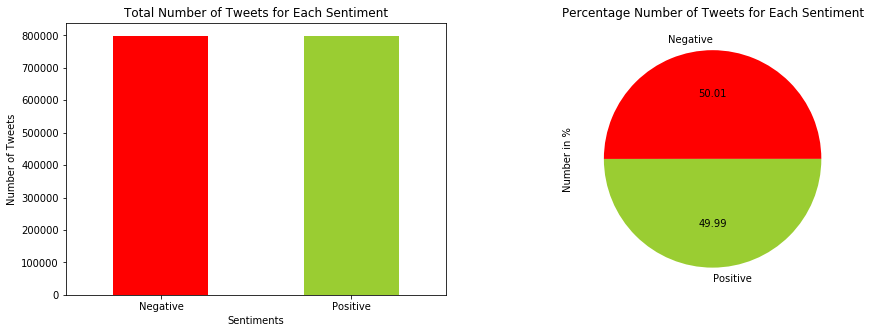

In [10]:
f = plt.figure(figsize = (15,5))

#make bar plot 
f.add_subplot(1, 2, 1)
colors = ["red", "yellowgreen"]
pd.Series(data["target"]).value_counts().plot(kind = "bar", color = colors, rot = 0, title = "Total Number of Tweets for Each Sentiment")
plt.xlabel("Sentiments", fontsize = 10)
plt.ylabel("Number of Tweets", fontsize = 10)

#make pie chart 
f.add_subplot(1, 2, 2)
colors = ["red", "yellowgreen"]
pd.Series(data["target"]).value_counts().plot(kind = "pie", colors = colors, labels = ["Negative", "Positive"], autopct = '%.2f', title = "Percentage Number of Tweets for Each Sentiment")
plt.ylabel("Number in %")

***
Berdasarkan data di atas, dapat kita lihat bahwa tweets yang dibuat memiliki nilai sentimen negatif dan sentimen positif yang hampir sama yaitu sebesar 50.1% dan 49.99%.
***

### 2. Word Cloud

In [11]:
#group the data for each sentiment
negative = data.loc[data["target"] == "Negative"]
positive = data.loc[data["target"] == "Positive"]

#make text set for each sentiment
all_desc_negative = "".join(negative.text.values)
all_desc_positive = "".join(positive.text.values)

### 2.1 Positive Word Cloud

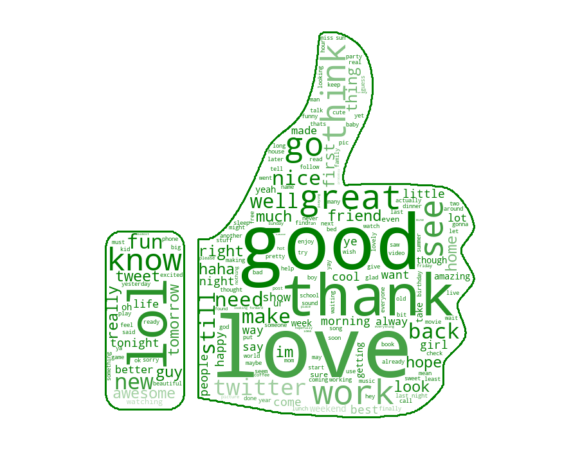

In [12]:
#function for creat word cloud
mask = np.array(Image.open("thumb.png"))
image_colors = ImageColorGenerator(mask)
cloud = WordCloud(background_color = "white", mask = mask, color_func = image_colors, contour_width = 2, contour_color = "green", max_words = 200, stopwords = set(STOPWORDS)).generate(all_desc_positive)
cloud.to_file("thumb_mask.png")
plt.figure(figsize = (16, 8))
plt.imshow(cloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

***
Jika kita lihat dari word cloud di atas, tweets dengan sentimen positif sebagian besar berupa ucapan kasih sayang, terima kasih, pujian dan rasa gembira. Hal tersebut dapat kita lihat dari kata-kata yang paling banyak muncul seperti kata "love", "thank", "good", "lol", "great" dan lain sebagainya.
***

### 2.2 Negative Word Cloud

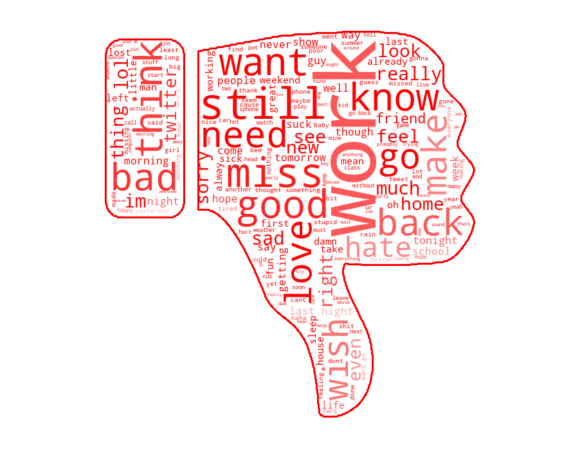

In [13]:
mask = np.array(Image.open("thumb1.png"))
image_colors = ImageColorGenerator(mask)
cloud = WordCloud(background_color = "white", mask = mask, color_func = image_colors, contour_width = 2, contour_color = "red", max_words = 200, stopwords = set(STOPWORDS)).generate(all_desc_negative)
cloud.to_file("thumb1_mask.png")
plt.figure(figsize = (16, 8))
plt.imshow(cloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

***
Jika kita lihat dari word cloud di atas, tweets dengan sentimen negatif sebagian besar berupa rasa lelah, rasa rindu dan rasa sedih. Hal tersebut dapat kita lihat dari kata-kata yang paling banyak muncul seperti kata "work", "miss", "need", "bad", "sad" dan lain sebagainya.
***

## Feature Extraction

### 1. Count Vectorizer 

In [14]:
count_vectorizer = CountVectorizer(stop_words = "english")

### 2. TF-IDF Vectorizer 

In [15]:
tfidf = TfidfVectorizer(stop_words = "english")

## Modelling

### 1. Train Test Split

In [16]:
X = data["text"]
y = data["target"]

In [17]:
#countvectorizer
X_vectorizer = count_vectorizer.fit_transform(X)

#tfidf vectorizer
X_tfidf = tfidf.fit_transform(X)

In [18]:
#train test split using countvectorizer 
train_X_vectorizer, test_X_vectorizer, train_y_v, test_y_v = train_test_split(X_vectorizer, y, test_size = 0.2, random_state = 0)

#train test split using tfidfvectorizer 
train_X_tfidf, test_X_tfidf, train_y, test_y = train_test_split(X_tfidf, y, test_size = 0.2, random_state = 0)

### 2. Model Machine Learning
* 2.1 Logistic Regression
* 2.2 K-Nearest Neighbor

### 2.1 Logistic Regression

In [19]:
# Countvectorizer
Lr_vect = LogisticRegression()
Lr_vect.fit(train_X_vectorizer, train_y_v)
Lr_pred_vect_train = Lr_vect.predict(train_X_vectorizer)
Lr_pred_vect_test = Lr_vect.predict(test_X_vectorizer)
pred_y_v = Lr_vect.predict(test_X_vectorizer)
print(pred_y_v)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


['Negative' 'Negative' 'Negative' ... 'Positive' 'Negative' 'Positive']


In [20]:
# TFIDFVectorizer
Lr_tfidf = LogisticRegression()
Lr_tfidf.fit(train_X_tfidf,train_y)
Lr_pred_tfidf_train = Lr_tfidf.predict(train_X_tfidf)
Lr_pred_tfidf_test = Lr_tfidf.predict(test_X_tfidf)
pred_y = Lr_vect.predict(test_X_tfidf)
print(pred_y)

['Negative' 'Negative' 'Negative' ... 'Positive' 'Negative' 'Positive']


### 2.2 Multinomial Naive Bayes

In [21]:
# Countvectorizer
NB_vect = MultinomialNB()
NB_vect.fit(train_X_vectorizer,train_y_v)
NB_pred_vect_train = NB_vect.predict(train_X_vectorizer)
NB_pred_vect_test = NB_vect.predict(test_X_vectorizer)
print(pred_y_v)

['Negative' 'Negative' 'Negative' ... 'Positive' 'Negative' 'Positive']


In [22]:
# TFIDFVectorizer
NB_tfidf = MultinomialNB()
NB_tfidf.fit(train_X_tfidf,train_y)
NB_pred_tfidf_train = NB_tfidf.predict(train_X_tfidf)
NB_pred_tfidf_test = NB_tfidf.predict(test_X_tfidf)
print(pred_y)

['Negative' 'Negative' 'Negative' ... 'Positive' 'Negative' 'Positive']


### 3. Model Evaluation
The following option are kind of model evaluation that used:
- Precision = precision_score()
- Recall = recall_score() 
- F_measure = f1_score()

### 3.1 Logistic Regression

In [23]:
# using count vectorizer
print("______________ Countvectorizer ______________")

Lr_recall_vec_train = recall_score(train_y_v, Lr_pred_vect_train, average = "micro")
Lr_recall_vec_test = recall_score(test_y_v, Lr_pred_vect_test, average = "micro") 

Lr_precision_vec_train = precision_score(train_y_v, Lr_pred_vect_train, average = "micro")
Lr_precision_vec_test = precision_score(test_y_v, Lr_pred_vect_test, average = "micro")

Lr_f1_score_vec_train = f1_score(train_y_v, Lr_pred_vect_train, average = "micro")
Lr_f1_score_vec_test = f1_score(test_y_v, Lr_pred_vect_test, average = "micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (Lr_recall_vec_train * 100), '&', '%.2f%%' % (Lr_recall_vec_test * 100))
print('Precision train & test  : %.2f%%' % (Lr_precision_vec_train * 100), '&', '%.2f%%' % (Lr_precision_vec_test * 100))
print('F1 Score train & test   : %.2f%%' % (Lr_f1_score_vec_train * 100), '&', '%.2f%%' % (Lr_f1_score_vec_test * 100))

______________ Countvectorizer ______________
Information :
Recall train & test     : 80.25% & 76.98%
Precision train & test  : 80.25% & 76.98%
F1 Score train & test   : 80.25% & 76.98%


In [24]:
# using TF-IDF vectorizer
print("______________ TF-IDF ______________")

Lr_recall_tfidf_train = recall_score(train_y, Lr_pred_tfidf_train, average = "micro")
Lr_recall_tfidf_test = recall_score(test_y, Lr_pred_tfidf_test, average = "micro") 

Lr_precision_tfidf_train = precision_score(train_y, Lr_pred_tfidf_train, average = "micro")
Lr_precision_tfidf_test = precision_score(test_y, Lr_pred_tfidf_test, average = "micro")

Lr_f1_score_tfidf_train = f1_score(train_y, Lr_pred_tfidf_train, average = "micro")
Lr_f1_score_tfidf_test = f1_score(test_y, Lr_pred_tfidf_test, average = "micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (Lr_recall_tfidf_train * 100), '&', '%.2f%%' % (Lr_recall_tfidf_test * 100))
print('Precision train & test  : %.2f%%' % (Lr_precision_tfidf_train * 100), '&', '%.2f%%' % (Lr_precision_tfidf_test * 100))
print('F1 Score train & test   : %.2f%%' % (Lr_f1_score_tfidf_train * 100), '&', '%.2f%%' % (Lr_f1_score_vec_test * 100))

______________ TF-IDF ______________
Information :
Recall train & test     : 79.48% & 77.10%
Precision train & test  : 79.48% & 77.10%
F1 Score train & test   : 79.48% & 76.98%


### 3.2 Multinomial Naive Bayes

In [25]:
# using count vectorizer
print("______________ Countvectorizer ______________")

NB_recall_vec_train = recall_score(train_y_v, NB_pred_vect_train, average = "micro")
NB_recall_vec_test = recall_score(test_y_v, NB_pred_vect_test, average = "micro") 

NB_precision_vec_train = precision_score(train_y_v, NB_pred_vect_train, average = "micro")
NB_precision_vec_test = precision_score(test_y_v, NB_pred_vect_test, average = "micro")

NB_f1_score_vec_train = f1_score(train_y_v, NB_pred_vect_train, average = "micro")
NB_f1_score_vec_test = f1_score(test_y_v, NB_pred_vect_test, average = "micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (NB_recall_vec_train * 100), '&', '%.2f%%' % (NB_recall_vec_test * 100))
print('Precision train & test  : %.2f%%' % (NB_precision_vec_train * 100), '&', '%.2f%%' % (NB_precision_vec_test * 100))
print('F1 Score train & test   : %.2f%%' % (NB_f1_score_vec_train * 100), '&', '%.2f%%' % (NB_f1_score_vec_test * 100))

______________ Countvectorizer ______________
Information :
Recall train & test     : 79.09% & 76.21%
Precision train & test  : 79.09% & 76.21%
F1 Score train & test   : 79.09% & 76.21%


In [26]:
# using TF-IDF vectorizer
print("______________ TF-IDF ______________")

NB_recall_tfidf_train = recall_score(train_y, NB_pred_tfidf_train, average = "micro")
NB_recall_tfidf_test = recall_score(test_y, NB_pred_tfidf_test, average = "micro") 

NB_precision_tfidf_train = precision_score(train_y, NB_pred_tfidf_train, average = "micro")
NB_precision_tfidf_test = precision_score(test_y, NB_pred_tfidf_test, average = "micro")

NB_f1_score_tfidf_train = f1_score(train_y, NB_pred_tfidf_train, average = "micro")
NB_f1_score_tfidf_test = f1_score(test_y, NB_pred_tfidf_test, average = "micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (NB_recall_tfidf_train * 100), '&', '%.2f%%' % (NB_recall_tfidf_test * 100))
print('Precision train & test  : %.2f%%' % (NB_precision_tfidf_train * 100), '&', '%.2f%%' % (NB_precision_tfidf_test * 100))
print('F1 Score train & test   : %.2f%%' % (NB_f1_score_tfidf_train * 100), '&', '%.2f%%' % (NB_f1_score_vec_test * 100))

______________ TF-IDF ______________
Information :
Recall train & test     : 79.13% & 75.63%
Precision train & test  : 79.13% & 75.63%
F1 Score train & test   : 79.13% & 76.21%


### 4. Resume
Berdasarkan hasil perbandingan dua algoritma di atas, algoritma yang memberikan hasil paling baik adalah Logistik Regression menggunakan COunt Vectorizer dengan nilai Recall train & test: 80.25% & 76.98%, Precision train & test: 80.25% & 76.98% dan F1 Score train & test: 80.25% & 76.98%. Namun hasil tersebut masih belum bisa dikatakan valid dikarenakan tidak dilakukan pengaturan parameter-parameter terhadap masing-masing algoritma, dimana parameter-parameter yang dimiliki pada masing-masing algoritma bisa memberikan pengaruh besar terhadap hasil yang didapat.

## CONCLUSION
Dalam dunia bisnis, sentiment analysis bisa menjadi sesuatu yang sangat berguna. Suatu perusahaan bisa mengolah berbagai data masukan, kritikan dan keluhan dari pelayanan atau produk yang mereka tawarkan sehigga bisa mereka gunakan untuk memperbaiki kualitas dari pelayanan atau produk yang mereka tawarkan. Sebagai contoh, dari data di atas kita dapat menganggap tweets tersebut dibuat oleh pelanggan dari perusahaan kita, sehingga kita bisa mengetahui suasana hati atau perasaan dari pelanggan kita saat ini. Saat kita mengetahui tweets yang dibuat oleh pelanggan kita menunjukkan sentimen yang positif maka kita dapat memberikan suatu penawaran produk atau promo terhadap pelanggan tersebut, tetapi saat kita mengetahui tweets yang dibuat oleh pelanggan kita menunjukkan sentimen yang negatif kita dapat memberikan email yang berisi kartu ucapan atau quotes yang dapat memperbaiki suasana hati dari pelanggan kita sehingga mereka merasa diperhatikan oleh kita.

***
# THANK YOU